In [ ]:
# 获取数据

In [265]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import os

In [259]:
df = pdr.get_data_tiingo('601398', start='2020-01-01', end='2021-08-11', api_key=os.getenv('TIINGO_API_KEY'))

In [260]:
df

close  high   low  open     volume  \
symbol date                                                            
601398 2020-01-01 00:00:00+00:00   5.88  5.88  5.88  5.88          0   
       2020-01-02 00:00:00+00:00   5.97  6.03  5.91  5.92  234949400   
       2020-01-03 00:00:00+00:00   5.99  6.02  5.96  5.97  152213050   
       2020-01-06 00:00:00+00:00   5.97  6.05  5.95  5.96  226509710   
       2020-01-07 00:00:00+00:00   6.01  6.04  5.98  5.98  116804350   
...                                 ...   ...   ...   ...        ...   
       2021-08-05 00:00:00+00:00   4.54  4.57  4.53  4.55  109747160   
       2021-08-06 00:00:00+00:00   4.53  4.55  4.51  4.55  158732840   
       2021-08-09 00:00:00+00:00   4.55  4.57  4.51  4.52  192560060   
       2021-08-10 00:00:00+00:00   4.56  4.57  4.52  4.55  177389100   
       2021-08-11 00:00:00+00:00   4.65  4.66  4.57  4.57  330727250   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
601398 2020-01-01 00:00:00+00:00  5.299197  5.299197  5.299197  5.299197   
       2020-01-02 00:00:00+00:00  5.380307  5.434381  5.326234  5.335246   
       2020-01-03 00:00:00+00:00  5.398332  5.425369  5.371295  5.380307   
       2020-01-06 00:00:00+00:00  5.380307  5.452405  5.362283  5.371295   
       2020-01-07 00:00:00+00:00  5.416356  5.443393  5.389320  5.389320   
...                                    ...       ...       ...       ...   
       2021-08-05 00:00:00+00:00  4.540000  4.570000  4.530000  4.550000   
       2021-08-06 00:00:00+00:00  4.530000  4.550000  4.510000  4.550000   
       2021-08-09 00:00:00+00:00  4.550000  4.570000  4.510000  4.520000   
       2021-08-10 00:00:00+00:00  4.560000  4.570000  4.520000  4.550000   
       2021-08-11 00:00:00+00:00  4.650000  4.660000  4.570000  4.570000   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
601398 2020-01-01 00:00:00+00:00          0      0.0          1.0  
       2020-01-02 00:00:00+00:00  234949400      0.0          1.0  
       2020-01-03 00:00:00+00:00  152213050      0.0          1.0  
       2020-01-06 00:00:00+00:00  226509710      0.0          1.0  
       2020-01-07 00:00:00+00:00  116804350      0.0          1.0  
...                                     ...      ...          ...  
       2021-08-05 00:00:00+00:00  109747160      0.0          1.0  
       2021-08-06 00:00:00+00:00  158732840      0.0          1.0  
       2021-08-09 00:00:00+00:00  192560060      0.0          1.0  
       2021-08-10 00:00:00+00:00  177389100      0.0          1.0  
       2021-08-11 00:00:00+00:00  330727250      0.0          1.0  

[420 rows x 12 columns]

<AxesSubplot:xlabel='symbol,date'>

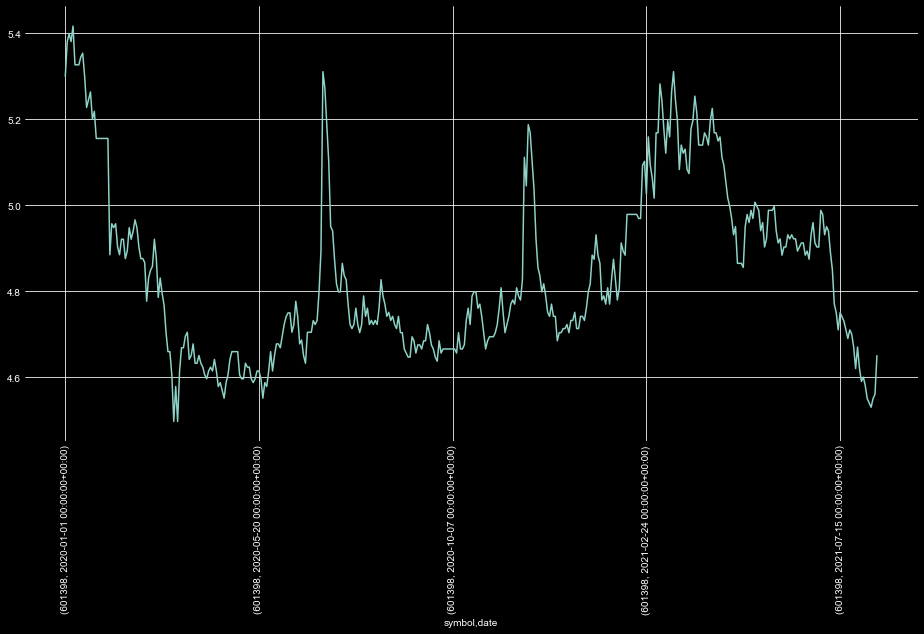

In [261]:
plt.style.use('dark_background')

ax = plt.gca()
df['adjClose'].plot(figsize=(16,8), rot=90, grid=True, ax=ax)

In [262]:
df['ma5'] = df['adjClose'].rolling(window=5).mean()
df['ma60'] = df['adjClose'].rolling(window=60).mean()

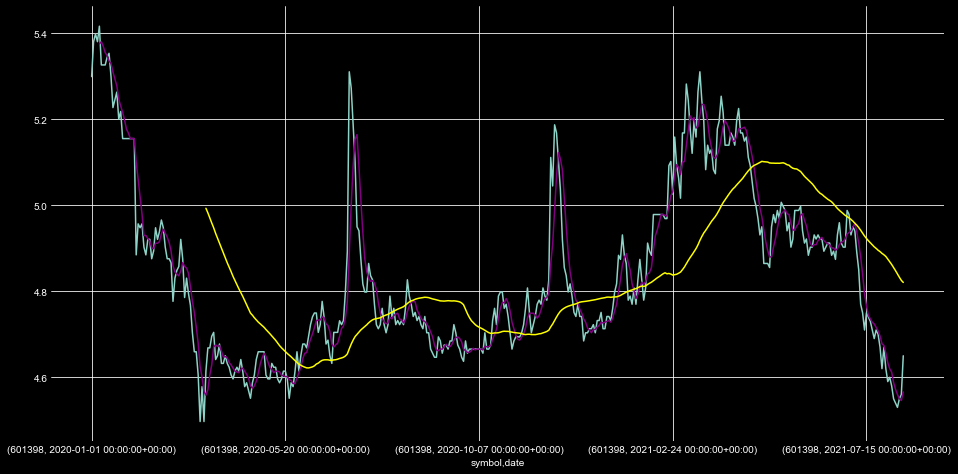

In [263]:
ax = plt.gca()
df['adjClose'].plot(figsize=(16,8), rot=90, grid=True, ax=ax)
df['ma5'].plot(ax=ax, color='purple')
df['ma60'].plot(ax=ax, color='yellow')
plt.show()

In [253]:

buy_list  = []
sell_list = []
balance_list = []
curr_balance = 10000
curr_stock = 0

for x in range(len(df)):
        price = df['adjClose'].iloc[x]
        minimum_buy = price * 100

        # buy, buy, buy 
        ma_short = df['ma5'].iloc[x]
        ma_long = df['ma100'].iloc[x]
        if (ma_short > ma_long) and (curr_balance > minimum_buy):
            hands = int(curr_balance / (price * 100))
            curr_stock = hands * 100
            curr_balance = curr_balance - curr_stock * price
            buy_list.append(price)
            sell_list.append(float('nan'))
            print("buy {}".format(curr_stock) + str(df.index[x]))
        elif (ma_short < ma_long) and (curr_stock > 100):
            curr_balance = curr_balance + curr_stock * price
            print("sell {}".format(curr_stock) + str(df.index[x]))
            curr_stock = 0
            sell_list.append(price)
            buy_list.append(float('nan'))
        else:
            buy_list.append(float('nan'))
            sell_list.append(float('nan'))

df['buy'] = buy_list
df['sell'] = sell_list


buy 2100('601398', Timestamp('2020-06-12 00:00:00+0000', tz='UTC'))
sell 2100('601398', Timestamp('2020-06-22 00:00:00+0000', tz='UTC'))
buy 2000('601398', Timestamp('2020-06-30 00:00:00+0000', tz='UTC'))
sell 2000('601398', Timestamp('2020-09-01 00:00:00+0000', tz='UTC'))
buy 2000('601398', Timestamp('2020-10-22 00:00:00+0000', tz='UTC'))
sell 2000('601398', Timestamp('2020-10-30 00:00:00+0000', tz='UTC'))
buy 2000('601398', Timestamp('2020-11-12 00:00:00+0000', tz='UTC'))
sell 2000('601398', Timestamp('2020-11-17 00:00:00+0000', tz='UTC'))
buy 2000('601398', Timestamp('2020-11-20 00:00:00+0000', tz='UTC'))
sell 2000('601398', Timestamp('2020-12-21 00:00:00+0000', tz='UTC'))
buy 1900('601398', Timestamp('2021-01-13 00:00:00+0000', tz='UTC'))
sell 1900('601398', Timestamp('2021-04-30 00:00:00+0000', tz='UTC'))


In [254]:
curr_balance

9633.25611973

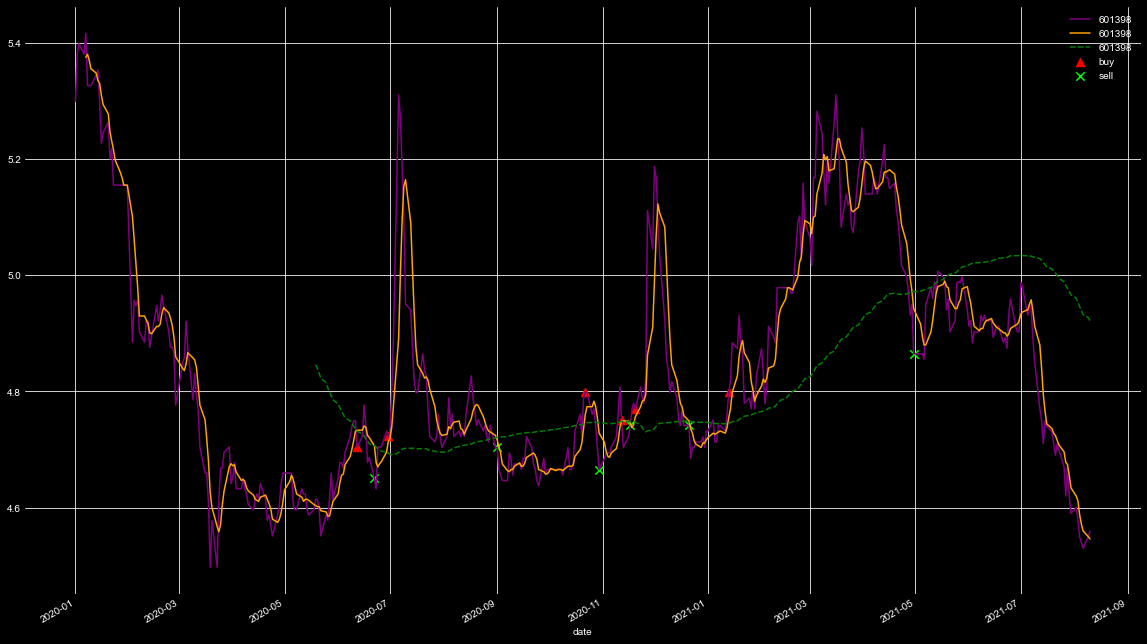

In [255]:
sdf = df.unstack(level=0)


ax = plt.gca()

sdf['adjClose'].plot(ax=ax, figsize=(20,12), rot=9, grid=True, label='price', color='purple')
sdf['ma5'].plot(ax=ax, label='ma5', color='orange', linestyle='-')
sdf['ma100'].plot(ax=ax, label='ma100', color='green', linestyle='--')

x = pd.to_datetime(sdf.index, format='%Y/%m/%d')
# plt.scatter(x, df['buy'].values)
ax.scatter(x, y=sdf['buy'].values, label='buy', marker='^', s=70, color='red')
ax.scatter(x, y=sdf['sell'].values, label='sell', marker='x', s=70, color='#00ff00')
plt.legend(loc="upper right")

plt.show()

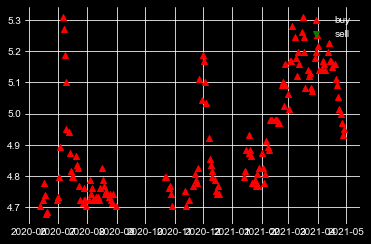

In [168]:
ax = plt.gca()
ax.scatter(x, y=sdf['buy'].values, label='buy', marker='^', color='red')
ax.scatter(x, y=sdf['sell'].values, label='sell', marker='v', color='green')
plt.legend(loc="upper right")

plt.show()

     01/01/2016  01/07/2016  01/14/2017
ABC          12          34          51
XYZ           9          76          12
PQR          12          23           7
DEF          54           4          34


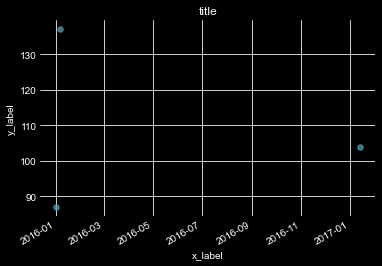

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# replicate Data from question in DataFrame
v = [[12,34,51], [9,76,12], [12,23,7], [54,4,34]]
df1 = pd.DataFrame(v, columns=["01/01/2016","01/07/2016","01/14/2017"], 
                      index=["ABC", "XYZ", "PQR", "DEF"])
print(df1)


def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.autofmt_xdate()

#use column headers as x values
x = pd.to_datetime(df1.columns, format='%m/%d/%Y')
# sum all values from DataFrame along vertical axis
y = df1.values.sum(axis=0)    
scatterplot(x,y, "x_label", "y_label", "title")

plt.show()

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00',
               '2020-01-03 00:00:00+00:00', '2020-01-06 00:00:00+00:00',
               '2020-01-07 00:00:00+00:00', '2020-01-08 00:00:00+00:00',
               '2020-01-09 00:00:00+00:00', '2020-01-10 00:00:00+00:00',
               '2020-01-13 00:00:00+00:00', '2020-01-14 00:00:00+00:00',
               ...
               '2021-07-28 00:00:00+00:00', '2021-07-29 00:00:00+00:00',
               '2021-07-30 00:00:00+00:00', '2021-08-02 00:00:00+00:00',
               '2021-08-03 00:00:00+00:00', '2021-08-04 00:00:00+00:00',
               '2021-08-05 00:00:00+00:00', '2021-08-06 00:00:00+00:00',
               '2021-08-09 00:00:00+00:00', '2021-08-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=419, freq=None)

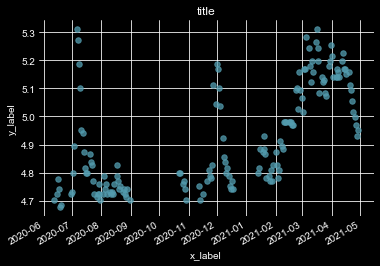

In [130]:
#use column headers as x values
x = pd.to_datetime(df.unstack(level=0).index, format='%Y/%m/%d')
# sum all values from DataFrame along vertical axis
y = df['buy'].values
scatterplot(x,y, "x_label", "y_label", "title")
x

In [126]:
df.unstack(level=0).index

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00',
               '2020-01-03 00:00:00+00:00', '2020-01-06 00:00:00+00:00',
               '2020-01-07 00:00:00+00:00', '2020-01-08 00:00:00+00:00',
               '2020-01-09 00:00:00+00:00', '2020-01-10 00:00:00+00:00',
               '2020-01-13 00:00:00+00:00', '2020-01-14 00:00:00+00:00',
               ...
               '2021-07-28 00:00:00+00:00', '2021-07-29 00:00:00+00:00',
               '2021-07-30 00:00:00+00:00', '2021-08-02 00:00:00+00:00',
               '2021-08-03 00:00:00+00:00', '2021-08-04 00:00:00+00:00',
               '2021-08-05 00:00:00+00:00', '2021-08-06 00:00:00+00:00',
               '2021-08-09 00:00:00+00:00', '2021-08-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=419, freq=None)

In [134]:
df.to_csv("save.csv")

In [159]:
sdf = df.unstack(level=0)
sdf

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,ma5,ma100,buy,sell
symbol,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398
date,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,5.88,5.88,5.88,5.88,0,5.299197,5.299197,5.299197,5.299197,0,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,5.97,6.03,5.91,5.92,234949400,5.380307,5.434381,5.326234,5.335246,234949400,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,5.99,6.02,5.96,5.97,152213050,5.398332,5.425369,5.371295,5.380307,152213050,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,5.97,6.05,5.95,5.96,226509710,5.380307,5.452405,5.362283,5.371295,226509710,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,6.01,6.04,5.98,5.98,116804350,5.416356,5.443393,5.389320,5.389320,116804350,0.0,1.0,5.3749,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04 00:00:00+00:00,4.55,4.58,4.54,4.58,148301900,4.550000,4.580000,4.540000,4.580000,148301900,0.0,1.0,4.5880,4.946124,NaN,NaN
2021-08-05 00:00:00+00:00,4.54,4.57,4.53,4.55,109747160,4.540000,4.570000,4.530000,4.550000,109747160,0.0,1.0,4.5720,4.939084,NaN,NaN


In [211]:
df

close  high   low  open     volume  \
symbol date                                                            
601398 2020-01-01 00:00:00+00:00   5.88  5.88  5.88  5.88          0   
       2020-01-02 00:00:00+00:00   5.97  6.03  5.91  5.92  234949400   
       2020-01-03 00:00:00+00:00   5.99  6.02  5.96  5.97  152213050   
       2020-01-06 00:00:00+00:00   5.97  6.05  5.95  5.96  226509710   
       2020-01-07 00:00:00+00:00   6.01  6.04  5.98  5.98  116804350   
...                                 ...   ...   ...   ...        ...   
       2021-08-04 00:00:00+00:00   4.55  4.58  4.54  4.58  148301900   
       2021-08-05 00:00:00+00:00   4.54  4.57  4.53  4.55  109747160   
       2021-08-06 00:00:00+00:00   4.53  4.55  4.51  4.55  158732840   
       2021-08-09 00:00:00+00:00   4.55  4.57  4.51  4.52  192560060   
       2021-08-10 00:00:00+00:00   4.56  4.57  4.52  4.55  177389100   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
601398 2020-01-01 00:00:00+00:00  5.299197  5.299197  5.299197  5.299197   
       2020-01-02 00:00:00+00:00  5.380307  5.434381  5.326234  5.335246   
       2020-01-03 00:00:00+00:00  5.398332  5.425369  5.371295  5.380307   
       2020-01-06 00:00:00+00:00  5.380307  5.452405  5.362283  5.371295   
       2020-01-07 00:00:00+00:00  5.416356  5.443393  5.389320  5.389320   
...                                    ...       ...       ...       ...   
       2021-08-04 00:00:00+00:00  4.550000  4.580000  4.540000  4.580000   
       2021-08-05 00:00:00+00:00  4.540000  4.570000  4.530000  4.550000   
       2021-08-06 00:00:00+00:00  4.530000  4.550000  4.510000  4.550000   
       2021-08-09 00:00:00+00:00  4.550000  4.570000  4.510000  4.520000   
       2021-08-10 00:00:00+00:00  4.560000  4.570000  4.520000  4.550000   

                                  adjVolume  divCash  splitFactor     ma5  \
symbol date                                                                 
601398 2020-01-01 00:00:00+00:00          0      0.0          1.0     NaN   
       2020-01-02 00:00:00+00:00  234949400      0.0          1.0     NaN   
       2020-01-03 00:00:00+00:00  152213050      0.0          1.0     NaN   
       2020-01-06 00:00:00+00:00  226509710      0.0          1.0     NaN   
       2020-01-07 00:00:00+00:00  116804350      0.0          1.0  5.3749   
...                                     ...      ...          ...     ...   
       2021-08-04 00:00:00+00:00  148301900      0.0          1.0  4.5880   
       2021-08-05 00:00:00+00:00  109747160      0.0          1.0  4.5720   
       2021-08-06 00:00:00+00:00  158732840      0.0          1.0  4.5600   
       2021-08-09 00:00:00+00:00  192560060      0.0          1.0  4.5500   
       2021-08-10 00:00:00+00:00  177389100      0.0          1.0  4.5460   

                                     ma100  buy  sell  
symbol date                                            
601398 2020-01-01 00:00:00+00:00       NaN  NaN   NaN  
       2020-01-02 00:00:00+00:00       NaN  NaN   NaN  
       2020-01-03 00:00:00+00:00       NaN  NaN   NaN  
       2020-01-06 00:00:00+00:00       NaN  NaN   NaN  
       2020-01-07 00:00:00+00:00       NaN  NaN   NaN  
...                                    ...  ...   ...  
       2021-08-04 00:00:00+00:00  4.946124  NaN   NaN  
       2021-08-05 00:00:00+00:00  4.939084  NaN   NaN  
       2021-08-06 00:00:00+00:00  4.932419  NaN   NaN  
       2021-08-09 00:00:00+00:00  4.927091  NaN   NaN  
       2021-08-10 00:00:00+00:00  4.921295  NaN   NaN  

[419 rows x 16 columns]

In [216]:
sample = {'symbol': [601398, 601398, 601398, 601398], 'date': ['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00', '2020-01-06 00:00:00+00:00'], 'close': [5.88, 5.97, 5.99, 5.97], 'high': [5.88, 6.03, 6.02, 6.05], 'low': [5.88, 5.91, 5.96, 5.95], 'open': [5.88, 5.92, 5.97, 5.96], 'volume': [0, 234949400, 152213050, 226509710], 'adjClose': [5.2991971571, 5.3803073177, 5.3983317978, 5.3803073177], 'adjHigh': [5.2991971571, 5.4343807581, 5.425368518, 5.4524052382], 'adjLow': [5.2991971571, 5.3262338773, 5.3712950777, 5.3622828376], 'adjOpen': [5.2991971571, 5.3352461174, 5.3803073177, 5.3712950777], 'adjVolume': [0, 234949400, 152213050, 226509710], 'divCash': [0.0, 0.0, 0.0, 0.0], 'splitFactor': [1.0, 1.0, 1.0, 1.0], 'ma5': [np.nan, np.nan, np.nan, np.nan], 'ma100': [np.nan, np.nan, np.nan, np.nan], 'buy': [np.nan, np.nan, np.nan, np.nan], 'sell': [np.nan, np.nan, np.nan, np.nan]}
df = pd.DataFrame(sample)

In [220]:
df

close  high   low  open     volume  \
symbol date                                                            
601398 2020-01-01 00:00:00+00:00   5.88  5.88  5.88  5.88          0   
       2020-01-02 00:00:00+00:00   5.97  6.03  5.91  5.92  234949400   
       2020-01-03 00:00:00+00:00   5.99  6.02  5.96  5.97  152213050   
       2020-01-06 00:00:00+00:00   5.97  6.05  5.95  5.96  226509710   
       2020-01-07 00:00:00+00:00   6.01  6.04  5.98  5.98  116804350   
...                                 ...   ...   ...   ...        ...   
       2021-08-04 00:00:00+00:00   4.55  4.58  4.54  4.58  148301900   
       2021-08-05 00:00:00+00:00   4.54  4.57  4.53  4.55  109747160   
       2021-08-06 00:00:00+00:00   4.53  4.55  4.51  4.55  158732840   
       2021-08-09 00:00:00+00:00   4.55  4.57  4.51  4.52  192560060   
       2021-08-10 00:00:00+00:00   4.56  4.57  4.52  4.55  177389100   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
601398 2020-01-01 00:00:00+00:00  5.299197  5.299197  5.299197  5.299197   
       2020-01-02 00:00:00+00:00  5.380307  5.434381  5.326234  5.335246   
       2020-01-03 00:00:00+00:00  5.398332  5.425369  5.371295  5.380307   
       2020-01-06 00:00:00+00:00  5.380307  5.452405  5.362283  5.371295   
       2020-01-07 00:00:00+00:00  5.416356  5.443393  5.389320  5.389320   
...                                    ...       ...       ...       ...   
       2021-08-04 00:00:00+00:00  4.550000  4.580000  4.540000  4.580000   
       2021-08-05 00:00:00+00:00  4.540000  4.570000  4.530000  4.550000   
       2021-08-06 00:00:00+00:00  4.530000  4.550000  4.510000  4.550000   
       2021-08-09 00:00:00+00:00  4.550000  4.570000  4.510000  4.520000   
       2021-08-10 00:00:00+00:00  4.560000  4.570000  4.520000  4.550000   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
601398 2020-01-01 00:00:00+00:00          0      0.0          1.0  
       2020-01-02 00:00:00+00:00  234949400      0.0          1.0  
       2020-01-03 00:00:00+00:00  152213050      0.0          1.0  
       2020-01-06 00:00:00+00:00  226509710      0.0          1.0  
       2020-01-07 00:00:00+00:00  116804350      0.0          1.0  
...                                     ...      ...          ...  
       2021-08-04 00:00:00+00:00  148301900      0.0          1.0  
       2021-08-05 00:00:00+00:00  109747160      0.0          1.0  
       2021-08-06 00:00:00+00:00  158732840      0.0          1.0  
       2021-08-09 00:00:00+00:00  192560060      0.0          1.0  
       2021-08-10 00:00:00+00:00  177389100      0.0          1.0  

[419 rows x 12 columns]

In [223]:
df1 = pd.read_csv('save.csv')

In [235]:
df

close  high   low  open     volume  \
symbol date                                                            
601398 2020-01-01 00:00:00+00:00   5.88  5.88  5.88  5.88          0   
       2020-01-02 00:00:00+00:00   5.97  6.03  5.91  5.92  234949400   
       2020-01-03 00:00:00+00:00   5.99  6.02  5.96  5.97  152213050   
       2020-01-06 00:00:00+00:00   5.97  6.05  5.95  5.96  226509710   
       2020-01-07 00:00:00+00:00   6.01  6.04  5.98  5.98  116804350   
...                                 ...   ...   ...   ...        ...   
       2021-08-04 00:00:00+00:00   4.55  4.58  4.54  4.58  148301900   
       2021-08-05 00:00:00+00:00   4.54  4.57  4.53  4.55  109747160   
       2021-08-06 00:00:00+00:00   4.53  4.55  4.51  4.55  158732840   
       2021-08-09 00:00:00+00:00   4.55  4.57  4.51  4.52  192560060   
       2021-08-10 00:00:00+00:00   4.56  4.57  4.52  4.55  177389100   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
601398 2020-01-01 00:00:00+00:00  5.299197  5.299197  5.299197  5.299197   
       2020-01-02 00:00:00+00:00  5.380307  5.434381  5.326234  5.335246   
       2020-01-03 00:00:00+00:00  5.398332  5.425369  5.371295  5.380307   
       2020-01-06 00:00:00+00:00  5.380307  5.452405  5.362283  5.371295   
       2020-01-07 00:00:00+00:00  5.416356  5.443393  5.389320  5.389320   
...                                    ...       ...       ...       ...   
       2021-08-04 00:00:00+00:00  4.550000  4.580000  4.540000  4.580000   
       2021-08-05 00:00:00+00:00  4.540000  4.570000  4.530000  4.550000   
       2021-08-06 00:00:00+00:00  4.530000  4.550000  4.510000  4.550000   
       2021-08-09 00:00:00+00:00  4.550000  4.570000  4.510000  4.520000   
       2021-08-10 00:00:00+00:00  4.560000  4.570000  4.520000  4.550000   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
601398 2020-01-01 00:00:00+00:00          0      0.0          1.0  
       2020-01-02 00:00:00+00:00  234949400      0.0          1.0  
       2020-01-03 00:00:00+00:00  152213050      0.0          1.0  
       2020-01-06 00:00:00+00:00  226509710      0.0          1.0  
       2020-01-07 00:00:00+00:00  116804350      0.0          1.0  
...                                     ...      ...          ...  
       2021-08-04 00:00:00+00:00  148301900      0.0          1.0  
       2021-08-05 00:00:00+00:00  109747160      0.0          1.0  
       2021-08-06 00:00:00+00:00  158732840      0.0          1.0  
       2021-08-09 00:00:00+00:00  192560060      0.0          1.0  
       2021-08-10 00:00:00+00:00  177389100      0.0          1.0  

[419 rows x 12 columns]

In [236]:
df.reset_index(level=0, inplace=True)
df.index = df.index.date


In [256]:
sdf

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,ma5,ma100,buy,sell
symbol,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398,601398
date,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,5.88,5.88,5.88,5.88,0,5.299197,5.299197,5.299197,5.299197,0,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,5.97,6.03,5.91,5.92,234949400,5.380307,5.434381,5.326234,5.335246,234949400,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,5.99,6.02,5.96,5.97,152213050,5.398332,5.425369,5.371295,5.380307,152213050,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,5.97,6.05,5.95,5.96,226509710,5.380307,5.452405,5.362283,5.371295,226509710,0.0,1.0,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,6.01,6.04,5.98,5.98,116804350,5.416356,5.443393,5.389320,5.389320,116804350,0.0,1.0,5.3749,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04 00:00:00+00:00,4.55,4.58,4.54,4.58,148301900,4.550000,4.580000,4.540000,4.580000,148301900,0.0,1.0,4.5880,4.946124,NaN,NaN
2021-08-05 00:00:00+00:00,4.54,4.57,4.53,4.55,109747160,4.540000,4.570000,4.530000,4.550000,109747160,0.0,1.0,4.5720,4.939084,NaN,NaN


,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2020-01-01,601398,5.88,5.88,5.88,5.88,0,5.299197,5.299197,5.299197,5.299197,0,0.0,1.0
2020-01-02,601398,5.97,6.03,5.91,5.92,234949400,5.380307,5.434381,5.326234,5.335246,234949400,0.0,1.0
2020-01-03,601398,5.99,6.02,5.96,5.97,152213050,5.398332,5.425369,5.371295,5.380307,152213050,0.0,1.0
2020-01-06,601398,5.97,6.05,5.95,5.96,226509710,5.380307,5.452405,5.362283,5.371295,226509710,0.0,1.0
2020-01-07,601398,6.01,6.04,5.98,5.98,116804350,5.416356,5.443393,5.389320,5.389320,116804350,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,601398,4.55,4.58,4.54,4.58,148301900,4.550000,4.580000,4.540000,4.580000,148301900,0.0,1.0
2021-08-05,601398,4.54,4.57,4.53,4.55,109747160,4.540000,4.570000,4.530000,4.550000,109747160,0.0,1.0
2021-08-06,601398,4.53,4.55,4.51,4.55,158732840,4.530000,4.550000,4.510000,4.550000,158732840,0.0,1.0
2021-08-09,601398,4.55,4.57,4.51,4.52,192560060,4.550000,4.570000,4.510000,4.520000,192560060,0.0,1.0
